<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Medical-Insurance-Cost-Forecast-DL_Reg/blob/main/Medical_Insurance_Cost_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

## Load the data

In [2]:
# Read data directly from github [Important]

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Prepare the data

In [4]:
# One hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
X = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot['charges']

In [6]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
y[:5]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Divide into train and test dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
X_train[:5]

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [10]:
y_train[:5]

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [11]:
X_train.shape, X_test.shape

((1070, 11), (268, 11))

## Build a Model

In [12]:
# Build a NN model

tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13298.3328 - mae: 13298.3328
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12945.3002 - mae: 12945.3002
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12705.8516 - mae: 12705.8516
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13393.0255 - mae: 13393.0255
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13305.0852 - mae: 13305.0852
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13161.1847 - mae: 13161.1847
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13182.2408 - mae: 13182.2408
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13511.3947 - mae: 13511.3947
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 13284.3684 - mae: 13284.3684
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13429.63

## Evaluate on test

In [13]:
# Check the results of insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7539.9517 - mae: 7539.9517


[7539.95166015625, 7539.95166015625]

In [14]:
y_train.mean(), y_train.median()

(13346.089736364489, 9575.4421)

This shows that our model is performing substantially bad because error is pretty high when compared to mean or median.

## Improving our Model

1. Add extra layer (with more hidden units)
2. Increase number of units in layers.
3. Train for more epochs.
4. Try changing optimizer(SGD) [Gives `nan` loss]

In [15]:
# More Epochs [500]

# Build a NN model

tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13298.3328 - mae: 13298.3328
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 12945.3002 - mae: 12945.3002
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12705.8516 - mae: 12705.8516
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 13393.0255 - mae: 13393.0255
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 13305.0852 - mae: 13305.0852
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 13161.1847 - mae: 13161.1847
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 13182.2408 - mae: 13182.2408
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 13511.3947 - mae: 13511.3947
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 13284.3684 - mae: 13284.3684
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 13429.63

In [16]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6233.7979 - mae: 6233.7979


[6233.7978515625, 6233.7978515625]

In [17]:
# Build a NN model

tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model_3.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [18]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [19]:
# Changing optimizer to SGD [Gives nan Loss][Important]
# Build a NN model

tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan           
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 11/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 12/100
34/34 

In [20]:
# Adding another layer and Increasing neurons in 2nd Layer

# Build a NN model

tf.random.set_seed(42)

# 1. Create a model
insurance_model_5 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(50),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_5.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model_5.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13234.7150 - mae: 13234.7150
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12534.5281 - mae: 12534.5281
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 11304.2129 - mae: 11304.2129
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 9949.9326 - mae: 9949.9326
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7912.6520 - mae: 7912.6520
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7520.5711 - mae: 7520.5711
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7383.9624 - mae: 7383.9624
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7446.1834 - mae: 7446.1834
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7419.5155 - mae: 7419.5155
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7518.1795 - mae: 751

In [21]:
insurance_model_5.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3600.2983 - mae: 3600.2983


[3600.29833984375, 3600.29833984375]

In [22]:
# Adding another layer, increasing neurons in 2nd layer and increasing epochs to 300

# Build a model
insurance_model_6 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(50),
                                         tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_6.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# Fitting the model
history_6 = insurance_model_6.fit(X_train, y_train, epochs = 300)

Epoch 1/300
34/34 [==============================] - 0s 2ms/step - loss: 13257.7970 - mae: 13257.7970
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 12614.5368 - mae: 12614.5368
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 11464.8043 - mae: 11464.8043
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 10149.1475 - mae: 10149.1475
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 7979.3512 - mae: 7979.3512
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 7519.9582 - mae: 7519.9582
Epoch 7/300
34/34 [==============================] - 0s 1ms/step - loss: 7381.5317 - mae: 7381.5317
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 7443.6257 - mae: 7443.6257
Epoch 9/300
34/34 [==============================] - 0s 1ms/step - loss: 7415.0270 - mae: 7415.0270
Epoch 10/300
34/34 [==============================] - 0s 1ms/step - loss: 7511.6841 - mae: 7

In [23]:
insurance_model_6.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.4546 - mae: 3160.4546


[3160.45458984375, 3160.45458984375]

In [24]:
# First model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7539.9517 - mae: 7539.9517


[7539.95166015625, 7539.95166015625]

In [25]:
history_6.history['loss']

[13259.8447265625,
 12856.7705078125,
 11691.1630859375,
 9459.8798828125,
 7652.31982421875,
 7401.62158203125,
 7367.0654296875,
 7333.38037109375,
 7298.90234375,
 7266.0087890625,
 7234.4462890625,
 7193.58251953125,
 7154.46533203125,
 7113.2548828125,
 7075.61767578125,
 7032.8447265625,
 6992.8125,
 6942.64892578125,
 6897.0302734375,
 6848.140625,
 6800.48583984375,
 6751.46337890625,
 6696.5048828125,
 6646.19482421875,
 6599.79736328125,
 6559.220703125,
 6529.490234375,
 6503.07763671875,
 6479.97412109375,
 6468.525390625,
 6442.33349609375,
 6424.46435546875,
 6405.01416015625,
 6388.42041015625,
 6364.23583984375,
 6346.0634765625,
 6317.2314453125,
 6303.79541015625,
 6276.451171875,
 6252.916015625,
 6230.3896484375,
 6201.99462890625,
 6180.36376953125,
 6144.56640625,
 6121.36083984375,
 6101.52197265625,
 6062.5869140625,
 6018.48095703125,
 5985.03076171875,
 5949.24609375,
 5908.04345703125,
 5861.41650390625,
 5817.53271484375,
 5767.2421875,
 5714.72216796875,
 5

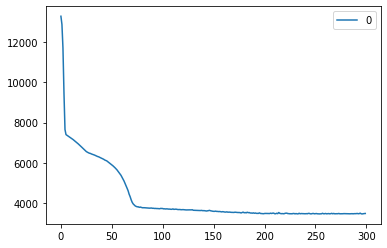

In [26]:
pd.DataFrame(history_6.history['loss']).plot()

Text(0, 0.5, 'loss and MAE')

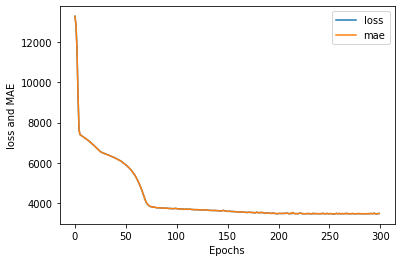

In [27]:
pd.DataFrame(history_6.history).plot()
plt.xlabel('Epochs')
plt.ylabel('loss and MAE')

Looks like our loss is still decreasing. So, we can train for some more epochs.

## Preprocessing Data (Normalization and standardization) [Extended]

In [28]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [32]:
# Create a colun transformer
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker', 'region'])
)

# Create X and y
X = insurance.drop("charges", axis = 1)
y = insurance['charges']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

# Fit the column transformer to training data
ct.fit(X_train)

# Transform training and testing data with fitted column transformer
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [33]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [34]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Now that we have normalized data now we will refit a neural network on this normalized data.

In [36]:
tf.random.set_seed(42)

# Build a model

normalized_data_model = tf.keras.Sequential([
                                             tf.keras.layers.Dense(100),
                                             tf.keras.layers.Dense(10),
                                             tf.keras.layers.Dense(1)
])

# Compile

normalized_data_model.compile(loss = tf.keras.losses.mae,
                              optimizer = tf.keras.optimizers.Adam(),
                              metrics = ['mae'])

# Fit the model

normalized_data_model.fit(X_train_normal, y_train, epochs = 300)

Epoch 1/300
34/34 [==============================] - 0s 1ms/step - loss: 13296.4671 - mae: 13296.4671
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 12948.4245 - mae: 12948.4245
Epoch 3/300
34/34 [==============================] - 0s 1ms/step - loss: 12705.2201 - mae: 12705.2201
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 13369.7395 - mae: 13369.7395
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 13230.8567 - mae: 13230.8567
Epoch 6/300
34/34 [==============================] - 0s 1ms/step - loss: 12995.1999 - mae: 12995.1999
Epoch 7/300
34/34 [==============================] - 0s 1ms/step - loss: 12876.1059 - mae: 12876.1059
Epoch 8/300
34/34 [==============================] - 0s 1ms/step - loss: 13004.0395 - mae: 13004.0395
Epoch 9/300
34/34 [==============================] - 0s 1ms/step - loss: 12508.0465 - mae: 12508.0465
Epoch 10/300
34/34 [==============================] - 0s 1ms/step - loss: 12304.99

In [37]:
normalized_data_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.1301 - mae: 3161.1301


[3161.130126953125, 3161.130126953125]

Compare with previous best model  
9/9 [==============================] - 0s 2ms/step - loss: 3160.4546 - mae: 3160.4546   
[3160.45458984375, 3160.45458984375]  